Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Frederick Oakley"
COLLABORATORS = ""

---

<div class="alert alert-block alert-info">
<h3>Student(s) Information</h3> Please provide information about yourself.<br>
<b>Name</b>: Frederick Oakley<br>
<b>NetID</b>: fjo25<br>
<b>IMPORTANT</b>
Your work will not be graded withour your initials below<br>
I certify that this lab represents my own work and I have read the RU academic intergrity policies at<br>
<a href="https://www.cs.rutgers.edu/academic-integrity/introduction">https://www.cs.rutgers.edu/academic-integrity/introduction </a><br>
<b>Initials</b>: FO


</div>

## Important
<font color='red'>
This project is provided to you as a class project in CS439. **DO NOT** post this notebook in any public or commerical space. Doing so may result in severe penalties. Please discuss with instructor if you have questions. 
</font>

# CS 439 - Introduction to Data Science
### Spring 2024

# Midsemester Project : Twitter Data Analysis

### Due Date : Thursday April 4th, 2024 by 11:59 PM 


### Completing this project
This is your mid-semester project. This is an individual project. Part 0 can only be completed if you have a paid Twitter account. We do not expect anyone to complete this part and it is TOTALLY optional. We left to show how to use API but it is NOT part of the project.
    


## Project Purpose    
 
The goal of this mid-semester project is to work with Twitter API to analyze tweets from a person, and in this case, Former President Donald Trump.  @RealDonaldTrump tweets provide a great opportunity to understand how online media can be used to communicate over the traditional media. In fact, social media post are so influential, now the traditional media spends considerable amount of time discussing social media posts. Tweets from people like Donald Trump and Elon Musk have become so consequential, they can move the stock market on short term and get network TV to debate and discuss hours and hours about what Trump or Musk meant.

We hope this project will be fun as we can analyze range of emotions, hope, controversy, vagueness that are part of Trump tweets. We are interested in seeing what conclusions you can draw from former US Presidents tweets. 
* DISCLAIMER: This project is not designed with any bias in mind. Note that we can pick any person (Hillary Clinton or Donald Trump or Elon Musk) or anyone else to do the same analysis. We hope your analysis is objective, independent of any political bias you may have. As Data Scientists, it is our responsiblity to do independent analysis of the data we try to understand. You should follow data and interpret insights w/o any bias.

## Grading of the Project
You can test your project with the files provided. We may test the correctness of your code using **different files**. As a result, we will not provide sample outputs for this project. You will need to determine if the output received is reasonable. We are not looking for 100% compatibility with any one data set.

## Set up
Let us get all the libaries initialized as necessary

In [2]:
# Run this cell to set up your notebook
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import json

# Ensure that Pandas shows at least 280 characters in columns, so we can see full tweets
pd.set_option('max_colwidth', 280)

%matplotlib inline
plt.style.use('fivethirtyeight')
!pip install seaborn

import seaborn as sns
sns.set()
sns.set_context("talk")
import re

Defaulting to user installation because normal site-packages is not writeable


## Downloading Tweets 
Note: After Musk acquired twitter, the access to API is no longer free. A free API access can only do a few things. 
The discussion below assumes that one has access to a paid account.
It is important to download the most recent tweets (especially if you are working as a group). You cannot download the recent tweets by @realdonaldtrump as he was inactive for last two years. But you can download tweets from @elonmusk or @joebiden to see how things work. Those who are working by themselves are allowed to use the downloaded files in data folder w/o setting up access to any twitter API (which can sometime be bit complicated). Twitter provides the API Tweepy (http://www.tweepy.org/) that makes it easy to access twitter content that is publicly available. We will also provide example code as needed.

In [3]:
## Make sure you have set up tweepy if you are working locally.
# https://www.pythoncentral.io/introduction-to-tweepy-twitter-for-python/
# After set up, the following should run:
!pip install tweepy
import tweepy

Defaulting to user installation because normal site-packages is not writeable


## (NOT REQUIRED) PART 0:  Accessing Twitter API (only for informational purposes)
This is optional, as this requires a **paid twitter developer** account. 

In order to access Twitter API, you need to get keys by signing up as a Twitter developer. We will walk you through this process. 
* if you are working by yourself on this project, you can skip PART 1, and complete the project using the data files provided in the data folder instead. We highly recommend that you do Part 1 as an individual (after completing the project with offline data). You will "learn" how to use Twitter API that might be useful for learning how to work with API's.

### Task 0.1

Follow the instructions below to get your Twitter API keys.  **Read the instructions completely before starting.**

1. [Create a Twitter account](https://twitter.com/).  You can use an existing account if you have one; if you prefer to not do this assignment under your regular account, feel free to create a throw-away account.
2. Under account settings, add your phone number to the account.
3. [Create a Twitter developer account](https://developer.twitter.com/en) by clicking the 'Apply' button on the top right of the page. Attach it to your Twitter account. You'll have to fill out a form describing what you want to do with the developer account. Explain that you are doing this for a class at Rutgers University and that you don't know exactly what you're building yet and just need the account to get started. These applications are approved by some sort of AI system, so it doesn't matter exactly what you write. Just don't enter a bunch of alweiofalwiuhflawiuehflawuihflaiwhfe type stuff or you might get rejected.
4. Once you're logged into your developer account, [create an application for this assignment](https://developer.twitter.com/en/docs/projects/overview).  You can call it whatever you want, and you can write any URL when it asks for a web site.  You don't need to provide a callback URL.
5. On the page for that application, find your Consumer Key and Consumer Secret.
6. On the same page, create an Access Token.  Record the resulting Access Token and Access Token Secret.
7. Edit the file [keys.json](keys.json) and replace the placeholders with your keys.

## WARNING (Please Read) !!!!


### Protect your Twitter Keys
<span style="color:red">
If someone has your authentication keys, they can access your Twitter account and post as you!  So don't give them to anyone, and **don't write them down in this notebook**. 
</span>
The usual way to store sensitive information like this is to put it in a separate file and read it programmatically.  That way, you can share the rest of your code without sharing your keys.  That's why we're asking you to put your keys in `keys.json` for this assignment.


### Avoid making too many API calls.

<span style="color:red">
Twitter limits developers to a certain rate of requests for data.  If you make too many requests in a short period of time, you'll have to wait awhile (around 15 minutes) before you can make more.  </span> 
So carefully follow the code examples you see and don't rerun cells without thinking.  Instead, always save the data you've collected to a file.  We've provided templates to help you do that.


### Be careful about which functions you call!

<span style="color:red">
This API can retweet tweets, follow and unfollow people, and modify your twitter settings.  Be careful which functions you invoke! </span> It is possible that you can accidentally re-tweet some tweets because you typed `retweet` instead of `retweet_count`. 
</span>


### Reading Keys.json

In [4]:
import json
key_file = 'keys.json'
# Loading your keys from keys.json (which you should have filled in question 1):
with open(key_file) as f:
    keys = json.load(f)
# if you print or view the contents of keys be sure to delete the cell!

FileNotFoundError: [Errno 2] No such file or directory: 'keys.json'

### Task 0.2 Testing Twitter Authentication
This following code should run w/o errors or warnings and display Rutgers University's twitter username

In [ ]:
import tweepy
from tweepy import TweepyException
import logging

try:
    auth = tweepy.OAuthHandler(keys["consumer_key"], keys["consumer_secret"])
    redirect_url = auth.get_authorization_url()
    auth.set_access_token(keys["access_token"], keys["access_token_secret"])
    api = tweepy.API(auth)
    print("Rutgers username is:", api.get_user(screen_name="RutgersU").name)
except TweepyException as e:
    logging.warning("There was a Tweepy error. Double check your API keys and try again.")
    logging.warning(e)

#### Getting more information from RutgersU
Find the following information about RutgersU. Show code and use a print statement to print the output.

In [ ]:
# What is RutgersU screen name?

# What is the location RutgersU?

# What is a description for RutgersU?

# How many follow RutgersU?

# When was RutgersU account created?

# Is RutgersU a verified account?


### Task 0.3

### Refactor and Extend Code

Re-factor the above twitter authentication code and extend the code into reusable snippets below.  

In [ ]:
def load_keys(path):
    """Loads your Twitter authentication keys from a file on disk.
    
    Args:
        path (str): The path to your key file.  The file should
          be in JSON format and look like this (but filled in):
            {
                "consumer_key": "<your Consumer Key here>",
                "consumer_secret":  "<your Consumer Secret here>",
                "access_token": "<your Access Token here>",
                "access_token_secret": "<your Access Token Secret here>"
            }
    
    Returns:
        dict: A dictionary mapping key names (like "consumer_key") to
          key values."""
    
    ### BEGIN ANSWER
   
    # your solution here

    ### END ANSWER

In [ ]:
def download_recent_tweets_by_user(user_account_name, keys):
    """Downloads tweets by one Twitter user.

    Args:
        user_account_name (str): The name of the Twitter account
          whose tweets will be downloaded.
        keys (dict): A Python dictionary with Twitter authentication
          keys (strings), like this (but filled in):
            {
                "consumer_key": "<your Consumer Key here>",
                "consumer_secret":  "<your Consumer Secret here>",
                "access_token": "<your Access Token here>",
                "access_token_secret": "<your Access Token Secret here>"
            }

    Returns:
        list: A list of Dictonary objects, each representing one tweet."""
    import tweepy
    
   ### BEGIN ANSWER
   
    # your solution here

    ### END ANSWER

In [26]:
def load_tweets(path):
    """Loads tweets that have previously been saved.
    
    Calling load_tweets(path) after save_tweets(tweets, path)
    will produce the same list of tweets.
    
    Args:
        path (str): The place where the tweets were be saved.

    Returns:
        list: A list of Dictionary objects, each representing one tweet."""
    
    ### BEGIN ANSWER
   
    # your solution here

    ### END ANSWER

In [27]:
def get_tweets_with_cache(user_account_name, keys_path):
    """Get recent tweets from one user, loading from a disk cache if available.
    
    The first time you call this function, it will download tweets by
    a user.  Subsequent calls will not re-download the tweets; instead
    they'll load the tweets from a save file in your local filesystem.
    All this is done using the functions you defined in the previous cell.
    This has benefits and drawbacks that often appear when you cache data:
    
    +: Using this function will prevent extraneous usage of the Twitter API.
    +: You will get your data much faster after the first time it's called.
    -: If you really want to re-download the tweets (say, to get newer ones,
       or because you screwed up something in the previous cell and your
       tweets aren't what you wanted), you'll have to find the save file
       (which will look like <something>_recent_tweets.pkl) and delete it.
    
    Args:
        user_account_name (str): The Twitter handle of a user, without the @.
        keys_path (str): The path to a JSON keys file in your filesystem.
    """
    
    ### BEGIN ANSWER
   
    # your solution here

    ### END ANSWER

### Task 0.4
If everything was implemented correctly you should be able to obtain roughly the last max number of tweets by @RutgersU. (This may take a few minutes)

In [28]:
# When you are done, run this cell to load latest @RutgersU 's tweets. This is to get the latest tweets. Do not use the cached file
rutgers_tweets = download_recent_tweets_by_user("RutgersU", key_file)
print("Number of tweets downloaded:", len(rutgers_tweets))

NameError: name 'download_recent_tweets_by_user' is not defined

## PART 1 - Working with Twitter Data 
The json file in srv/shared folder contains some loaded tweets from @RutgersU and @realdonaldtrump. Run the folllowing code and read and understand and what it does. Groups must download the latest tweets from @RutgersU using tweepy (and call that). Individuals can use the given file.

### Explore Rutgers tweets

In [5]:
from pathlib import Path
import json

ds_tweets_save_path = "/srv/shared/RutgersU_recent_tweets.json"   # file available from /srv/shared

# Guarding against attempts to download the data multiple
# times:
if not Path(ds_tweets_save_path).is_file():
    # Getting as many recent tweets by @RutgersU as Twitter will let us have.
    # We use tweet_mode='extended' so that Twitter gives us full 280 character tweets.
    # This was a change introduced in September 2017.
    
    # The tweepy Cursor API actually returns "sophisticated" Status objects but we 
    # will use the basic Python dictionaries stored in the _json field. 
    example_tweets = [t._json for t in tweepy.Cursor(api.user_timeline, screen_name="RutgersU", 
                                             tweet_mode='extended').items()]
    
    # Saving the tweets to a json file on disk for future analysis
    with open(ds_tweets_save_path, "w") as f:        
        json.dump(example_tweets, f)

# Re-loading the json file:
with open(ds_tweets_save_path, "r") as f:
    example_tweets = json.load(f)

If things ran as expected, you should be able to look at the first tweet by running the code below. It probabably does not make sense to view all tweets in a notebook, as size of the tweets can freeze your browser (always a good idea to press ctrl-S to save the latest, in case you have to restart Jupyter)

In [6]:
# Looking at one tweet object, which has type Status: 
from pprint import pprint # ...to get a more easily-readable view.
pprint(example_tweets[0]['full_text'])

("RT @RutgersNB: As the #internet turns 50, @RutgersCommInfo's @MaryChayko "
 'focuses on how we have used the innovation and what it has meant f…')


### Task 1.1 - First 50 Rutgers Tweets

In [7]:
# print the first 50 rutgers tweets full_text (separated by a line)
for i in range(0,50):
    pprint(example_tweets[i]['full_text'] + '\n')


("RT @RutgersNB: As the #internet turns 50, @RutgersCommInfo's @MaryChayko "
 'focuses on how we have used the innovation and what it has meant f…\n')
('RT @RutgersNB: According to U.S. Rep. @FrankPallone, "continuous '
 'pharmaceutical manufacturing is the future of medicine." Now, new '
 'legislat…\n')
('RT @RutgersLaw: The 34th Annual Mary Philbrook Public Interest Award '
 "Celebration honored Lloyd Freeman RLAW'07 (@Esquire1911), Partner and…\n")
('RT @prccrutgers: We will be holding our 4th Annual MLK Oratorical '
 'Competition in January 2020. You must write &amp; recite an original speech '
 'c…\n')
('Happy first day of November! Can you believe we are already more than '
 'halfway through the semester? 🍂\n'
 '\n'
 '📷: @curtiswebsterr on Instagram https://t.co/8tOBOjvVzl\n')
('RT @RUFedRelations: @EnergyCommerce @FrankPallone @ContinuousMFG @RutgersU '
 "To learn more about @FrankPallone's new pharmaceutical manufactu…\n")
('Daniel Hayden went back to school to pursue a physics

### Task 1.2 - First 50 Trump Tweets
To be consistent we are going to use the same dataset no matter what you get from your twitter api. So from this point on, if you are working as a group or individually, be sure to use the data sets provided to you in the data folder. One of the files is 'TrumpTweets_1.json', the other one is 'TrumpTweets_2.json'. First load TrumpTweets_1.

In [8]:
def load_tweets(path):
    """Loads tweets that have previously been saved.
    
    Calling load_tweets(path) after save_tweets(tweets, path)
    will produce the same list of tweets.
    
    Args:
        path (str): The place where the tweets will be saved.

    Returns:
        list: A list of Dictionary objects, each representing one tweet."""
    
    with open(path, "rb") as f:
        import json
        return json.load(f)

In [9]:
dest_path = "/srv/shared/TrumpTweets_1.json"
trump_tweets = load_tweets(dest_path)

In [10]:
# print the first 10 Trump tweets full_text only
for i in range(0,10):
    pprint(trump_tweets[i]['text'] + '\n')

('Will be leaving Florida for Washington (D.C.) today at 4:00 P.M. Much work '
 'to be done, but it will be a great New Year!\n')
('Iran is failing at every level despite the terrible deal made with them by '
 'the Obama Administration. The great Iranian people have been repressed for '
 'many years. They are hungry for food &amp; for freedom. Along with human '
 'rights, the wealth of Iran is being looted. TIME FOR CHANGE!\n')
('The United States has foolishly given Pakistan more than 33 billion dollars '
 'in aid over the last 15 years, and they have given us nothing but lies &amp; '
 'deceit, thinking of our leaders as fools. They give safe haven to the '
 'terrorists we hunt in Afghanistan, with little help. No more!\n')
('HAPPY NEW YEAR! We are MAKING AMERICA GREAT AGAIN, and much faster than '
 'anyone thought possible!\n')
('As our Country rapidly grows stronger and smarter, I want to wish all of my '
 'friends, supporters, enemies, haters, and even the very dishonest Fake News 

### Task 1.3 - Oldest Tweet

Find the number of the month of the oldest tweet.

In [11]:
# Find the number of the month of the oldest tweet (e.g. 1 for January)
trump_tweets = pd.DataFrame(trump_tweets)
### BEGIN 
#print(trump_tweets)
def oldest_tweet(df):
    oldest_date = min(df['created_at'])
    oldest_month = oldest_date.split(' ')[1]
    match oldest_month:
        case 'Jan':
            return 1
        case 'Feb':
            return 2
        case 'Mar':
            return 3
        case 'Apr':
            return 4
        case 'May':
            return 5
        case 'Jun':
            return 6
        case 'Jul':
            return 7
        case 'Aug':
            return 8
        case 'Sep':
            return 9
        case 'Oct':
            return 10
        case 'Nov':
            return 11
        case 'Dec':
            return 12
        case _:
            return 0
    # your solution here
### END ANSWER

oldest_month = oldest_tweet(trump_tweets)
print(oldest_month)

4


## PART 2  Twitter Source Analysis (group/individual)



### Task 2.1 - Create and Merge
Create and Merge two dataframes created from TrumpTweets_1 and TrumpTweets_2. Call this new dataframe all_tweets. Please check to make sure files are compatible.

In [12]:
### YOUR ANSWER
dest_path = "/srv/shared/TrumpTweets_2.json"
trump_tweets2 = load_tweets(dest_path)
trump_tweets1df = pd.DataFrame(trump_tweets)
trump_tweets2df = pd.DataFrame(trump_tweets2)
all_tweets = pd.concat([trump_tweets1df, trump_tweets2df], ignore_index=True)

######

all_tweets.head()

,source,id,text,created_at,retweet_count,in_reply_to_user_id_str,favorite_count,is_retweet,id_str,full_text,...,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,favorited,retweeted,possibly_sensitive,lang,extended_entities,retweeted_status
0,Twitter for iPhone,947824196909961216,"Will be leaving Florida for Washington (D.C.) today at 4:00 P.M. Much work to be done, but it will be a great New Year!",Mon Jan 01 13:37:52 +0000 2018,8237,None,51473,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Twitter for iPhone,947810806430826496,"Iran is failing at every level despite the terrible deal made with them by the Obama Administration. The great Iranian people have been repressed for many years. They are hungry for food &amp; for freedom. Along with human rights, the wealth of Iran is being looted. TIME FOR ...",Mon Jan 01 12:44:40 +0000 2018,14595,25073877,53557,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Twitter for iPhone,947802588174577664,"The United States has foolishly given Pakistan more than 33 billion dollars in aid over the last 15 years, and they have given us nothing but lies &amp; deceit, thinking of our leaders as fools. They give safe haven to the terrorists we hunt in Afghanistan, with little help. ...",Mon Jan 01 12:12:00 +0000 2018,49566,None,138808,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Twitter for iPhone,947614110082043904,"HAPPY NEW YEAR! We are MAKING AMERICA GREAT AGAIN, and much faster than anyone thought possible!",Sun Dec 31 23:43:04 +0000 2017,35164,None,154769,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Twitter for iPhone,947592785519173637,"As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!",Sun Dec 31 22:18:20 +0000 2017,39428,None,157655,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Task 2.2
Construct a DataFrame called `df_trump` containing all the tweets stored in `all_tweets`. 
**Important:** There may/will be some overlap so be sure to __eliminate duplicate tweets__. If you do not eliminate the duplicates properly, your results might not be compatible with the test solution. **Hint:** the `id` of a tweet is always unique.

The index of the dataframe should be the ID of each tweet (looks something like `907698529606541312`). df_trump should have these columns:

- `time`: The time the tweet was created encoded as a datetime object. (Use `pd.to_datetime` to encode the timestamp.)
- `source`: The source device of the tweet.
- `text`: The text of the tweet.
- `retweet_count`: The retweet count of the tweet.
- `favorite_count`: The favorite count of the tweet.

Finally, **the resulting dataframe should be sorted by date/time.**

**Warning:** *Some tweets may store the text in the `text` field and other will use the `full_text` field.*

In [13]:
# Sort daaframe by date/time (earliet tweet first)

### BEGIN 
df_trump = all_tweets.drop_duplicates(subset=['id'], keep='first')
df_trump = df_trump[['id','created_at', 'source', 'text', 'full_text', 'retweet_count', 'favorite_count']].copy()
df_trump['text'] = df_trump['text'].fillna('') + df_trump['full_text'].fillna('')
df_trump.drop(['full_text'], axis=1, inplace=True)
df_trump.rename(columns={'created_at':'time'},inplace=True)
df_trump['time'] = pd.to_datetime(df_trump['time'])

df_trump.sort_values(by='time')
df_trump['id'] = df_trump['id'].astype(np.int64)

df_trump.set_index('id', inplace=True)
df_trump.tail()

# your solution here

### END ANSWER

,time,source,text,retweet_count,favorite_count
id,,,,,
921207772233990144,2017-10-20 02:53:42+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","The Fake News is going crazy with wacky Congresswoman Wilson(D), who was SECRETLY on a very personal call, and gave a total lie on content!",19277,85920
921189980843663360,2017-10-20 01:43:00+00:00,"<a href=""https://studio.twitter.com"" rel=""nofollow"">Media Studio</a>","Keep up the GREAT work. I am with you 100%!\n\n""ISIS is losing its grip...""\nArmy Colonel Ryan Dillon\nCJTF–OIR\nhttps://t.co/jVGuvv5mzm https://t.co/PSCXg38CtS",11882,52196
921113816053755904,2017-10-19 20:40:21+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",It was great to have Governor @RicardoRossello of #PuertoRico🇵🇷with us at the @WhiteHouse today. We are with you! #PRStrong https://t.co/Op2xDZxvNc,10158,47493
920988223362469891,2017-10-19 12:21:18+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",".@foxandfriends ""Russia sent millions to Clinton Foundation""",23219,69861
920981920787386368,2017-10-19 11:56:15+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Workers of firm involved with the discredited and Fake Dossier take the 5th. Who paid for it, Russia, the FBI or the Dems (or all)?",24788,83417


In the following questions, we are going to find out the charateristics of Trump tweets and the devices used for the tweets.

First let's examine the source field:

In [14]:
df_trump['source'].unique()

array(['Twitter for iPhone', 'Media Studio', 'Twitter for iPad',
       'Twitter Web Client', 'Twitter Ads', 'Twitter for Android',
       'Periscope', 'TweetDeck', 'Instagram', 'Mobile Web (M5)',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="https://studio.twitter.com" rel="nofollow">Media Studio</a>',
       '<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'],
      dtype=object)

### Task 2.3 - Remove HTML Tags

Remove the HTML tags from the source text field. 

**Hint:** Use `df_trump['source'].str.replace` and your favorite regular expression.

In [15]:
import re
### BEGIN 
df_trump['source'] = df_trump['source'].str.replace(r'<[^>]*>', '')
    # your solution here
df_trump.tail()

### END ANSWER

/tmp/ipykernel_2247407/4011686964.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_trump['source'] = df_trump['source'].str.replace(r'<[^>]*>', '')


,time,source,text,retweet_count,favorite_count
id,,,,,
921207772233990144,2017-10-20 02:53:42+00:00,Twitter for iPhone,"The Fake News is going crazy with wacky Congresswoman Wilson(D), who was SECRETLY on a very personal call, and gave a total lie on content!",19277,85920
921189980843663360,2017-10-20 01:43:00+00:00,Media Studio,"Keep up the GREAT work. I am with you 100%!\n\n""ISIS is losing its grip...""\nArmy Colonel Ryan Dillon\nCJTF–OIR\nhttps://t.co/jVGuvv5mzm https://t.co/PSCXg38CtS",11882,52196
921113816053755904,2017-10-19 20:40:21+00:00,Twitter for iPhone,It was great to have Governor @RicardoRossello of #PuertoRico🇵🇷with us at the @WhiteHouse today. We are with you! #PRStrong https://t.co/Op2xDZxvNc,10158,47493
920988223362469891,2017-10-19 12:21:18+00:00,Twitter for iPhone,".@foxandfriends ""Russia sent millions to Clinton Foundation""",23219,69861
920981920787386368,2017-10-19 11:56:15+00:00,Twitter for iPhone,"Workers of firm involved with the discredited and Fake Dossier take the 5th. Who paid for it, Russia, the FBI or the Dems (or all)?",24788,83417


#### Question. What is the most common device used for Trump tweets? Make a plot to find out the most common device types used 
Sort the plot in decreasing order of the most common device type

<Axes: xlabel='Device Type', ylabel='Frequency of Use'>

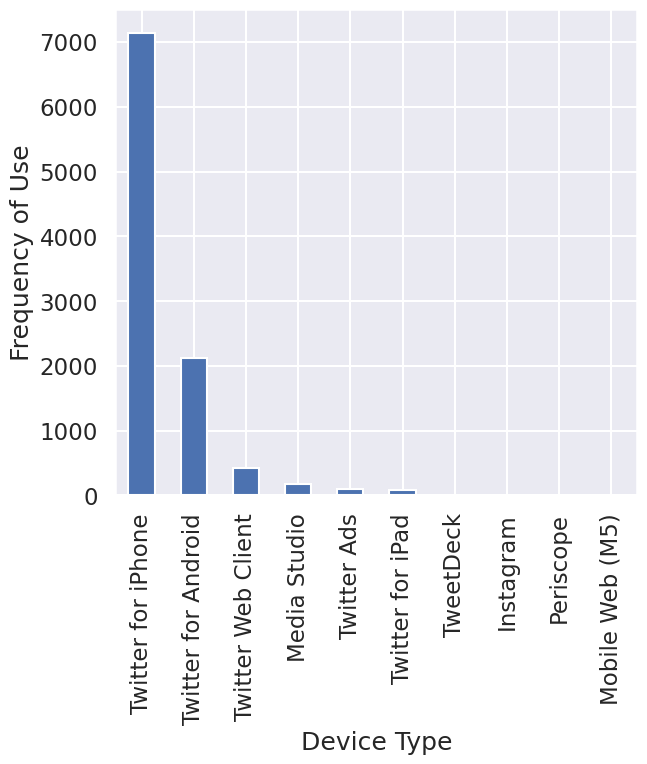

In [16]:
### BEGIN 
device_counts = df_trump['source'].value_counts()
plt.figure(figsize=(6, 6))

plt.xlabel('Device Type')
plt.ylabel('Frequency of Use')
device_counts.plot(kind='bar')
    # your solution here
    

### END ANSWER

### Task 2.4 - Device Analysis
Is there a difference between his Tweet behavior across these devices? We will attempt to answer this question in our subsequent analysis.

First, we'll take a look at whether Trump's tweets from an Android come at different times than his tweets from an iPhone. Note that Twitter gives us his tweets in the [UTC timezone](https://www.wikiwand.com/en/List_of_UTC_time_offsets) (notice the `+0000` in the first few tweets)

**Note** - If your `time` column is not in datetime format, the following code will not work.

In [17]:
df_trump['time'][0:3]

id
947824196909961216   2018-01-01 13:37:52+00:00
947810806430826496   2018-01-01 12:44:40+00:00
947802588174577664   2018-01-01 12:12:00+00:00
Name: time, dtype: datetime64[ns, UTC]

We'll convert the tweet times to US Eastern Time, the timezone of New York and Washington D.C., since those are the places we would expect the most tweet activity from Trump.

In [18]:
df_trump['est_time'] = (
    df_trump['time'] # Set initial timezone to UTC
                 .dt.tz_convert("EST") # Convert to Eastern Time
)
df_trump.head()

,time,source,text,retweet_count,favorite_count,est_time
id,,,,,,
947824196909961216,2018-01-01 13:37:52+00:00,Twitter for iPhone,"Will be leaving Florida for Washington (D.C.) today at 4:00 P.M. Much work to be done, but it will be a great New Year!",8237,51473,2018-01-01 08:37:52-05:00
947810806430826496,2018-01-01 12:44:40+00:00,Twitter for iPhone,"Iran is failing at every level despite the terrible deal made with them by the Obama Administration. The great Iranian people have been repressed for many years. They are hungry for food &amp; for freedom. Along with human rights, the wealth of Iran is being looted. TIME FOR ...",14595,53557,2018-01-01 07:44:40-05:00
947802588174577664,2018-01-01 12:12:00+00:00,Twitter for iPhone,"The United States has foolishly given Pakistan more than 33 billion dollars in aid over the last 15 years, and they have given us nothing but lies &amp; deceit, thinking of our leaders as fools. They give safe haven to the terrorists we hunt in Afghanistan, with little help. ...",49566,138808,2018-01-01 07:12:00-05:00
947614110082043904,2017-12-31 23:43:04+00:00,Twitter for iPhone,"HAPPY NEW YEAR! We are MAKING AMERICA GREAT AGAIN, and much faster than anyone thought possible!",35164,154769,2017-12-31 18:43:04-05:00
947592785519173637,2017-12-31 22:18:20+00:00,Twitter for iPhone,"As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!",39428,157655,2017-12-31 17:18:20-05:00


**What you need to do:**

Add a column called `hour` to the `df_trump` table which contains the hour of the day as floating point number computed by:

$$
\text{hour} + \frac{\text{minute}}{60} + \frac{\text{second}}{60^2}
$$

In [33]:
df_trump['hour'] = df_trump['time'].dt.hour + (df_trump['time'].dt.minute / 60) + (df_trump['time'].dt.second / (60**2))

# a new column that contains the rounded hour
df_trump['roundhour']=round(df_trump['hour'])
df_trump.info()
df_trump.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10044 entries, 947824196909961216 to 920981920787386368
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   time            10044 non-null  datetime64[ns, UTC]
 1   source          10044 non-null  object             
 2   text            10044 non-null  object             
 3   retweet_count   10044 non-null  int64              
 4   favorite_count  10044 non-null  int64              
 5   est_time        10044 non-null  datetime64[ns, EST]
 6   hour            10044 non-null  float64            
 7   roundhour       10044 non-null  float64            
 8   year            10044 non-null  float64            
dtypes: datetime64[ns, EST](1), datetime64[ns, UTC](1), float64(3), int64(2), object(2)
memory usage: 784.7+ KB


,time,source,text,retweet_count,favorite_count,est_time,hour,roundhour,year
id,,,,,,,,,
947824196909961216,2018-01-01 13:37:52+00:00,Twitter for iPhone,"Will be leaving Florida for Washington (D.C.) today at 4:00 P.M. Much work to be done, but it will be a great New Year!",8237,51473,2018-01-01 08:37:52-05:00,13.631111,14.0,2018.00000
947810806430826496,2018-01-01 12:44:40+00:00,Twitter for iPhone,"Iran is failing at every level despite the terrible deal made with them by the Obama Administration. The great Iranian people have been repressed for many years. They are hungry for food &amp; for freedom. Along with human rights, the wealth of Iran is being looted. TIME FOR ...",14595,53557,2018-01-01 07:44:40-05:00,12.744444,13.0,2018.00000
947802588174577664,2018-01-01 12:12:00+00:00,Twitter for iPhone,"The United States has foolishly given Pakistan more than 33 billion dollars in aid over the last 15 years, and they have given us nothing but lies &amp; deceit, thinking of our leaders as fools. They give safe haven to the terrorists we hunt in Afghanistan, with little help. ...",49566,138808,2018-01-01 07:12:00-05:00,12.200000,12.0,2018.00000
947614110082043904,2017-12-31 23:43:04+00:00,Twitter for iPhone,"HAPPY NEW YEAR! We are MAKING AMERICA GREAT AGAIN, and much faster than anyone thought possible!",35164,154769,2017-12-31 18:43:04-05:00,23.717778,24.0,2017.99726
947592785519173637,2017-12-31 22:18:20+00:00,Twitter for iPhone,"As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!",39428,157655,2017-12-31 17:18:20-05:00,22.305556,22.0,2017.99726


Use the `roundhour` column and plot the number of tweets at every hour of the day.
Order the plot using the hour of the day (1 to 24). Use seaborn `countplot`

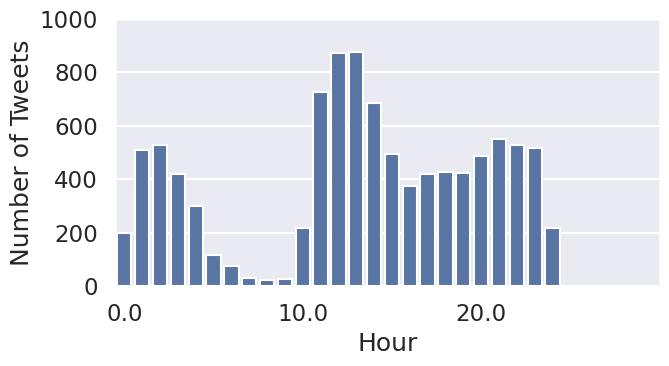

In [28]:
# make a bar plot here
plt.figure(figsize=(7, 4)) 
plt.ylabel('Number of Tweets')
plt.xlabel('Hour')
plt.tight_layout()  
sbplot = sns.countplot(x='roundhour', data=df_trump)
sbplot.set_ylim(0.00, 1000.00)
sbplot.set_xticks([0, 10, 20, 30])


### BEGIN ANSWER
   
    # your solution here

### END ANSWER

Now, use this data along with the seaborn `distplot` function to examine the distribution over hours of the day in eastern time that trump tweets on each device for the 2 most commonly used devices.  Your plot should look somewhat similar to the following.

<img src="images/device_hour2.png" align="left" alt="Drawing" style="width: 400px;"/>


/tmp/ipykernel_2258018/1484603277.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  s1 = sns.distplot(df_most_common['roundhour'], hist=False, label='iPhone',color='red')
/tmp/ipykernel_2258018/1484603277.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  s2 = sns.distplot(df_second_most_common['roun

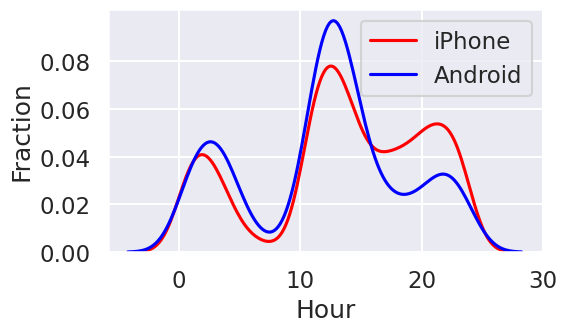

In [32]:
### BEGIN ANSWER
two_most_common_devices = device_counts.nlargest(2).index.tolist()
df_most_common = df_trump[df_trump['source'] == two_most_common_devices[0]]
df_second_most_common = df_trump[df_trump['source'] == two_most_common_devices[1]]
fig, ax = plt.subplots(1, 1, figsize=(5, 3))

s1 = sns.distplot(df_most_common['roundhour'], hist=False, label='iPhone',color='red')
s2 = sns.distplot(df_second_most_common['roundhour'], hist=False, label='Android',color='blue')

plt.xticks([0,10,20,30] )
plt.yticks([0,0.02,0.04,0.06,0.08] )
plt.ylabel('Fraction')
plt.xlabel('Hour')
#.tight_layout() 
plt.legend() 




    # your solution here

### END ANSWER

### Task 2.5

According to [this Verge article](https://www.theverge.com/2017/3/29/15103504/donald-trump-iphone-using-switched-android), Donald Trump switched from an Android to an iPhone sometime in March 2017.

Create a figure identical to your figure from 3.4, except that you should show the results only from 2016. If you get stuck consider looking at the `year_fraction` function from the next problem.

Use this data along with the seaborn `distplot` function to examine the distribution over hours of the day in eastern time that trump tweets on each device for the 2 most commonly used devices.  Your plot should look somewhat similar to the following. 

During the campaign, it was theorized that Donald Trump's tweets from Android were written by him personally, and the tweets from iPhone were from his staff. Does your figure give support the theory?

**Your Response**: 


In 2016, the time allocation for the usage of the iphone centered in the afternoon, while his tweets from 2015 to present shows that he mostly tweets in the morning. It seems that the tweets from iphone in 2016 were from his staff, not himself.

\\
<img src="images/device_hour2.png" align="left" alt="Drawing" style="width: 600px;"/>


/tmp/ipykernel_2258018/4246314024.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_most_common_2016['roundhour'], hist=False, label='iPhone',color='red')
/tmp/ipykernel_2258018/4246314024.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_second_most_common_2016['roun

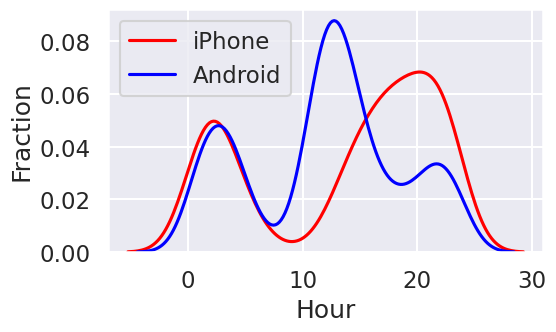

In [37]:

### BEGIN ANSWER
fig, ax = plt.subplots(1, 1, figsize=(5, 3))


### END ANSWER
df_most_common_2016 = df_most_common[df_most_common['est_time'].dt.year==2016]
df_second_most_common_2016 = df_second_most_common[df_second_most_common['est_time'].dt.year==2016]
sns.distplot(df_most_common_2016['roundhour'], hist=False, label='iPhone',color='red')
sns.distplot(df_second_most_common_2016['roundhour'], hist=False, label='Android',color='blue')

plt.xticks([0,10,20,30] )
plt.yticks([0,0.02,0.04,0.06,0.08] )
plt.ylabel('Fraction')
plt.xlabel('Hour')
#.tight_layout() 
plt.legend() 


### Task 2.6
Edit this cell to answer the following questions.
* What time of the day the Android tweets were made by Trump himself? (eg: morning, late night etc)

I would estimate that Trump made Android tweets himself in the afternoon, because that is when most of the tweets were made.

* What time of the day the Android tweets were made by paid staff?

I would estimate that his paid staff made a few promotional tweets in the morning and evening while Trump was away.

Note that these are speculations based on what you observe in the data set.

### Task 2.7 Device Analysis
Let's now look at which device he has used over the entire time period of this dataset.

To examine the distribution of dates we will convert the date to a fractional year that can be plotted as a distribution.

(Code borrowed from https://stackoverflow.com/questions/6451655/python-how-to-convert-datetime-dates-to-decimal-years)

In [38]:
import datetime
def year_fraction(date):
    start = datetime.date(date.year, 1, 1).toordinal()
    year_length = datetime.date(date.year+1, 1, 1).toordinal() - start
    return date.year + float(date.toordinal() - start) / year_length


df_trump['year'] = df_trump['time'].apply(year_fraction) #should be df_trump

Use the `sns.distplot` to overlay the distributions of the 2 most frequently used web technologies over the years.  Your final plot should be similar to:

![title](images/source_years.png)

/tmp/ipykernel_2258018/2457951656.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_most_common['year'], hist=True, label='iPhone',color='red')
/tmp/ipykernel_2258018/2457951656.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_second_most_common['year'], hist=True, label='Android',col

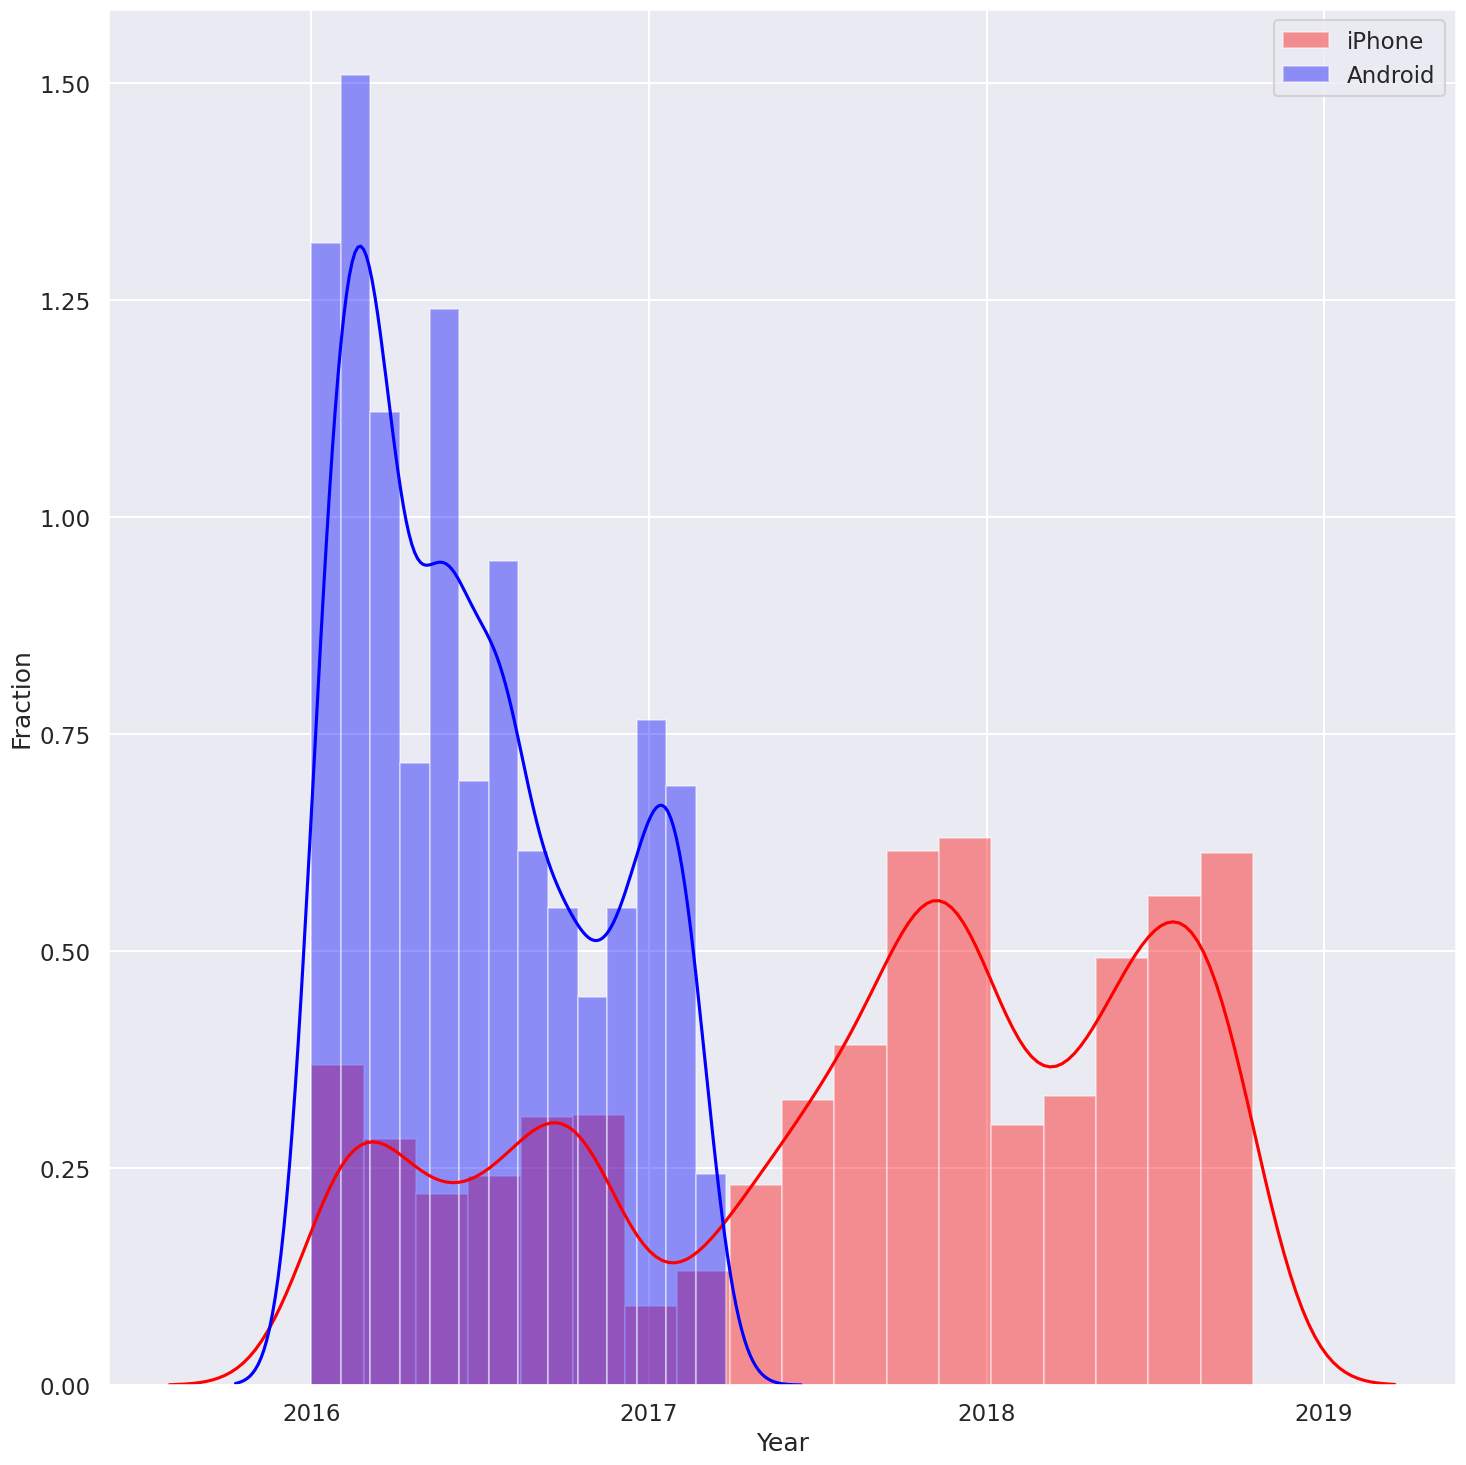

In [44]:
df_most_common = df_trump[df_trump['source'] == two_most_common_devices[0]]
df_second_most_common = df_trump[df_trump['source'] == two_most_common_devices[1]]

plt.figure(figsize=(15,15))
sns.distplot(df_most_common['year'], hist=True, label='iPhone',color='red')
sns.distplot(df_second_most_common['year'], hist=True, label='Android',color='blue')



plt.xticks(range(2016,2020))
plt.yticks(np.linspace(0,1.5,7))
plt.ylabel('Fraction')
plt.xlabel('Year')
plt.tight_layout() 
plt.legend() 
    # your solution here

### END ANSWER

## PART 3 - Sentiment Analysis

It turns out that we can use the words in Trump's tweets to calculate a measure of the sentiment of the tweet. For example, the sentence "I love America!" has positive sentiment, whereas the sentence "I hate taxes!" has a negative sentiment. In addition, some words have stronger positive / negative sentiment than others: "I love America." is more positive than "I like America."

We will use the [VADER (Valence Aware Dictionary and sEntiment Reasoner)](https://github.com/cjhutto/vaderSentiment) lexicon to analyze the sentiment of Trump's tweets. VADER is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media which is great for our usage.

The VADER lexicon gives the sentiment of individual words. Run the following cell to show the first few rows of the lexicon:

In [33]:
print(''.join(open("/srv/shared/vader_lexicon.txt").readlines()[:10]))



$:	-1.5	0.80623	[-1, -1, -1, -1, -3, -1, -3, -1, -2, -1]
%)	-0.4	1.0198	[-1, 0, -1, 0, 0, -2, -1, 2, -1, 0]
%-)	-1.5	1.43178	[-2, 0, -2, -2, -1, 2, -2, -3, -2, -3]
&-:	-0.4	1.42829	[-3, -1, 0, 0, -1, -1, -1, 2, -1, 2]
&:	-0.7	0.64031	[0, -1, -1, -1, 1, -1, -1, -1, -1, -1]
( '}{' )	1.6	0.66332	[1, 2, 2, 1, 1, 2, 2, 1, 3, 1]
(%	-0.9	0.9434	[0, 0, 1, -1, -1, -1, -2, -2, -1, -2]
('-:	2.2	1.16619	[4, 1, 4, 3, 1, 2, 3, 1, 2, 1]
(':	2.3	0.9	[1, 3, 3, 2, 2, 4, 2, 3, 1, 2]
((-:	2.1	0.53852	[2, 2, 2, 1, 2, 3, 2, 2, 3, 2]



### Task 3.1

As you can see, the lexicon contains emojis too! The first column of the lexicon is the *token*, or the word itself. The second column is the *polarity* of the word, or how positive / negative it is.

**Question** How did they decide the polarities of these words? What are the other two columns in the lexicon? (See the link above.)

 Read in the lexicon into a DataFrame called `df_sent`. The index of the DF should be the tokens in the lexicon. `df_sent` should have one column: `polarity`: The polarity of each token.

In [48]:
### BEGIN ANSWER
fields = ['tokens', 'polarity', 'std_dev', 'scores']

vader_lexicon_path = "../../data/vader_lexicon.txt"
df_sent = pd.read_csv(vader_lexicon_path,sep='\t',header=None,names=fields,index_col='tokens')
df_sent.drop(['std_dev', 'scores'], axis=1, inplace=True)
df_sent

# your solution here

### END ANSWER

,polarity
tokens,
$:,-1.5
%),-0.4
%-),-1.5
&-:,-0.4
&:,-0.7
...,...
}:,-2.1
}:(,-2.0
}:),0.4


### Task 3.2

Now, let's use this lexicon to calculate the overall sentiment for each of Trump's tweets. Here's the basic idea:

1. For each tweet, find the sentiment of each word.
2. Calculate the sentiment of each tweet by taking the sum of the sentiments of its words.

Be sure to lowercase the text in the tweets since the lexicon is also lowercase. Set the `text` column of the `df_trump` DF to be the lowercased text of each tweet.

In [49]:
### BEGIN ANSWER
df_trump["text"] = df_trump["text"].str.lower()
# your solution here
df_trump.tail()
### END ANSWER

,time,source,text,retweet_count,favorite_count,est_time,hour,roundhour,year,no_punc
id,,,,,,,,,,
921207772233990144,2017-10-20 02:53:42+00:00,Twitter for iPhone,"the fake news is going crazy with wacky congresswoman wilson(d), who was secretly on a very personal call, and gave a total lie on content!",19277,85920,2017-10-19 21:53:42-05:00,2.895000,3.0,2017.80000,the fake news is going crazy with wacky congresswoman wilson d who was secretly on a very personal call and gave a total lie on content
921189980843663360,2017-10-20 01:43:00+00:00,Media Studio,"keep up the great work. i am with you 100%!\n\n""isis is losing its grip...""\narmy colonel ryan dillon\ncjtf–oir\nhttps://t.co/jvguvv5mzm https://t.co/pscxg38cts",11882,52196,2017-10-19 20:43:00-05:00,1.716667,2.0,2017.80000,keep up the great work i am with you 100 \n\n isis is losing its grip \narmy colonel ryan dillon\ncjtf oir\nhttps t co jvguvv5mzm https t co pscxg38cts
921113816053755904,2017-10-19 20:40:21+00:00,Twitter for iPhone,it was great to have governor @ricardorossello of #puertorico🇵🇷with us at the @whitehouse today. we are with you! #prstrong https://t.co/op2xdzxvnc,10158,47493,2017-10-19 15:40:21-05:00,20.672500,21.0,2017.79726,it was great to have governor ricardorossello of puertorico with us at the whitehouse today we are with you prstrong https t co op2xdzxvnc
920988223362469891,2017-10-19 12:21:18+00:00,Twitter for iPhone,".@foxandfriends ""russia sent millions to clinton foundation""",23219,69861,2017-10-19 07:21:18-05:00,12.355000,12.0,2017.79726,foxandfriends russia sent millions to clinton foundation
920981920787386368,2017-10-19 11:56:15+00:00,Twitter for iPhone,"workers of firm involved with the discredited and fake dossier take the 5th. who paid for it, russia, the fbi or the dems (or all)?",24788,83417,2017-10-19 06:56:15-05:00,11.937500,12.0,2017.79726,workers of firm involved with the discredited and fake dossier take the 5th who paid for it russia the fbi or the dems or all


### Task 3.3

Now, let's get rid of punctuation since it'll cause us to fail to match words. Create a new column called `no_punc` in the `df_trump` to be the lowercased text of each tweet with all punctuation replaced by a single space. We consider punctuation characters to be any character that isn't a Unicode word character or a whitespace character. You may want to consult the Python documentation on regexes for this problem.

**Question** Why don't we simply remove punctuation instead of replacing with a space? See if you can figure this out by looking at the tweet data.
Because we will end up combining words, because Trump or his staff might have done grammatical/space errors. When we send words to be analyzed, we need them to be separated so that they contribute to our model's learning.

In [50]:
# Save your regex in punct_re
punct_re = r'[^\w\s\\n]'
df_trump['no_punc'] = df_trump['text'].str.lower().str.replace(punct_re, ' ')
df_trump.head()
### BEGIN ANSWER
   
# your solution here

### END ANSWER

/tmp/ipykernel_2258018/922243443.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_trump['no_punc'] = df_trump['text'].str.lower().str.replace(punct_re, ' ')


,time,source,text,retweet_count,favorite_count,est_time,hour,roundhour,year,no_punc
id,,,,,,,,,,
947824196909961216,2018-01-01 13:37:52+00:00,Twitter for iPhone,"will be leaving florida for washington (d.c.) today at 4:00 p.m. much work to be done, but it will be a great new year!",8237,51473,2018-01-01 08:37:52-05:00,13.631111,14.0,2018.00000,will be leaving florida for washington d c today at 4 00 p m much work to be done but it will be a great new year
947810806430826496,2018-01-01 12:44:40+00:00,Twitter for iPhone,"iran is failing at every level despite the terrible deal made with them by the obama administration. the great iranian people have been repressed for many years. they are hungry for food &amp; for freedom. along with human rights, the wealth of iran is being looted. time for ...",14595,53557,2018-01-01 07:44:40-05:00,12.744444,13.0,2018.00000,iran is failing at every level despite the terrible deal made with them by the obama administration the great iranian people have been repressed for many years they are hungry for food amp for freedom along with human rights the wealth of iran is being looted time for ...
947802588174577664,2018-01-01 12:12:00+00:00,Twitter for iPhone,"the united states has foolishly given pakistan more than 33 billion dollars in aid over the last 15 years, and they have given us nothing but lies &amp; deceit, thinking of our leaders as fools. they give safe haven to the terrorists we hunt in afghanistan, with little help. ...",49566,138808,2018-01-01 07:12:00-05:00,12.200000,12.0,2018.00000,the united states has foolishly given pakistan more than 33 billion dollars in aid over the last 15 years and they have given us nothing but lies amp deceit thinking of our leaders as fools they give safe haven to the terrorists we hunt in afghanistan with little help ...
947614110082043904,2017-12-31 23:43:04+00:00,Twitter for iPhone,"happy new year! we are making america great again, and much faster than anyone thought possible!",35164,154769,2017-12-31 18:43:04-05:00,23.717778,24.0,2017.99726,happy new year we are making america great again and much faster than anyone thought possible
947592785519173637,2017-12-31 22:18:20+00:00,Twitter for iPhone,"as our country rapidly grows stronger and smarter, i want to wish all of my friends, supporters, enemies, haters, and even the very dishonest fake news media, a happy and healthy new year. 2018 will be a great year for america!",39428,157655,2017-12-31 17:18:20-05:00,22.305556,22.0,2017.99726,as our country rapidly grows stronger and smarter i want to wish all of my friends supporters enemies haters and even the very dishonest fake news media a happy and healthy new year 2018 will be a great year for america


In [51]:
assert isinstance(punct_re, str)
assert re.search(punct_re, 'this') is None
assert re.search(punct_re, 'this is ok') is None
assert re.search(punct_re, 'this is\nok') is None
assert re.search(punct_re, 'this is not ok.') is not None
assert re.search(punct_re, 'this#is#ok') is not None
assert re.search(punct_re, 'this^is ok') is not None
assert df_trump['no_punc'].loc[800329364986626048] == 'i watched parts of  nbcsnl saturday night live last night  it is a totally one sided  biased show   nothing funny at all  equal time for us '
assert df_trump['text'].loc[884740553040175104] == 'working hard to get the olympics for the united states (l.a.). stay tuned!'


### Task 3.4


Now, let's convert the tweets into what's called a [*tidy format*](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html) to make the sentiments easier to calculate. Use the `no_punc` column of `df_trump` to create a table called `tidy_format`. The index of the table should be the IDs of the tweets, repeated once for every word in the tweet. It has two columns:

1. `num`: The location of the word in the tweet. For example, if the tweet was "i love america", then the location of the word "i" is 0, "love" is 1, and "america" is 2.
2. `word`: The individual words of each tweet.

The first few rows of our `tidy_format` table look like:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>num</th>
      <th>word</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>894661651760377856</th>
      <td>0</td>
      <td>i</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>1</td>
      <td>think</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>2</td>
      <td>senator</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>3</td>
      <td>blumenthal</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>4</td>
      <td>should</td>
    </tr>
  </tbody>
</table>

You can double check that your tweet with ID `894661651760377856` has the same rows as ours. Our tests don't check whether your table looks exactly like ours.

As usual, try to avoid using any for loops. Our solution uses a chain of 5 methods on the 'trump' DF, albeit using some rather advanced Pandas hacking.

* **Hint 1:** Try looking at the `expand` argument to pandas' `str.split`.

* **Hint 2:** Try looking at the `stack()` method.

* **Hint 3:** Try looking at the `level` parameter of the `reset_index` method.

In [53]:
#tidy_format = ...
tidy_words = []
fields = ['id','num','word']
for tweet_id, text in df_trump['no_punc'].items():
    words = text.split()
    for num,word in enumerate(words):
        tidy_words.append((tweet_id,num, word))
tidy_format = pd.DataFrame(tidy_words, columns=['id', 'num', 'word'])
tidy_format.set_index('id',inplace=True)
tidy_format
### BEGIN ANSWER
   
# your solution here

### END ANSWER

,num,word
id,,
947824196909961216,0,will
947824196909961216,1,be
947824196909961216,2,leaving
947824196909961216,3,florida
947824196909961216,4,for
...,...,...
920981920787386368,20,or
920981920787386368,21,the
920981920787386368,22,dems


In [54]:
assert tidy_format.loc[894661651760377856].shape == (27, 2)
assert ' '.join(list(tidy_format.loc[894661651760377856]['word'])) == 'i think senator blumenthal should take a nice long vacation in vietnam where he lied about his service so he can at least say he was there'

### Task 3.5

Now that we have this table in the tidy format, it becomes much easier to find the sentiment of each tweet: we can join the table with the lexicon table. 

Add a `polarity` column to the `df_trump` table.  The `polarity` column should contain the sum of the sentiment polarity of each word in the text of the tweet.

**Hint** you will need to merge the `tidy_format` and `df_sent` tables and group the final answer.


In [60]:
#pprint(df_sent)

#pprint(tidy_format)
#df_trump.head()

merge_tidy_format_sent = tidy_format.merge(df_sent, how='left', left_on='word',right_index=True)
polarity_per_tweet = merge_tidy_format_sent.groupby(level=0)['polarity'].sum()
df_trump=df_trump.join(polarity_per_tweet, how='left')

#df_trump['polarity'] = ...

### BEGIN ANSWER
   
# your solution here

### END ANSWER
#df_trump
#merge_tidy_format_sent

,time,source,text,retweet_count,favorite_count,est_time,hour,roundhour,year,no_punc,polarity
id,,,,,,,,,,,
682723973449289728,2016-01-01 00:44:14+00:00,Twitter for Android,"i will be on @foxnews live, with members of my family, at 11:50 p.m. we will ring in the new year together! make america great again!",2108,6735,2015-12-31 19:44:14-05:00,0.737222,1.0,2016.0,i will be on foxnews live with members of my family at 11 50 p m we will ring in the new year together make america great again,3.1
682764544402440192,2016-01-01 03:25:27+00:00,Twitter for iPhone,happy new year &amp; thank you! https://t.co/yo1yi8qbzy https://t.co/uxuxwj1rbv,3460,8581,2015-12-31 22:25:27-05:00,3.424167,3.0,2016.0,happy new year amp thank you https t co yo1yi8qbzy https t co uxuxwj1rbv,4.2
682792967736848385,2016-01-01 05:18:23+00:00,Twitter for iPhone,#happynewyearamerica! https://t.co/eeqb8pdrue,3434,9143,2016-01-01 00:18:23-05:00,5.306389,5.0,2016.0,happynewyearamerica https t co eeqb8pdrue,0.0
682805320217980929,2016-01-01 06:07:28+00:00,Twitter for iPhone,happy new year from #maralago! thank you to my great family for all of their support. https://t.co/6usqsiaaj7,1948,8258,2016-01-01 01:07:28-05:00,6.124444,6.0,2016.0,happy new year from maralago thank you to my great family for all of their support https t co 6usqsiaaj7,9.0
682805477168779264,2016-01-01 06:08:06+00:00,Twitter for Android,"""@jallenaip: hillary said she was in a ""fog of war"" as explanation for the lies about benghazi. no fog allowed in wh. vote trump potus!""",2721,7490,2016-01-01 01:08:06-05:00,6.135000,6.0,2016.0,jallenaip hillary said she was in a fog of war as explanation for the lies about benghazi no fog allowed in wh vote trump potus,-5.9


In [61]:
assert np.allclose(df_trump.loc[744701872456536064, 'polarity'], 8.4)
assert np.allclose(df_trump.loc[745304731346702336, 'polarity'], 2.5)
assert np.allclose(df_trump.loc[744519497764184064, 'polarity'], 1.7)
assert np.allclose(df_trump.loc[894661651760377856, 'polarity'], 0.2)
assert np.allclose(df_trump.loc[894620077634592769, 'polarity'], 5.4)
# If you fail this test, you dropped tweets with 0 polarity
#assert np.allclose(df_trump.loc[744355251365511169, 'polarity'], 0.0)


### Task 3.6
Now we have a measure of the sentiment of each of his tweets! You can read over the VADER readme to understand a more robust sentiment analysis.
Now, write the code to see the 20 most positive and most 20 negative tweets from Trump in your dataset:
Find the most negative and most positive tweets made by Trump

In [62]:
print('Most negative tweets:')
df_trump.sort_values(by='polarity')[:20]
### BEGIN ANSWER
   
# your solution here

### END ANSWER

Most negative tweets:


,time,source,text,retweet_count,favorite_count,est_time,hour,roundhour,year,no_punc,polarity
id,,,,,,,,,,,
934080974773776384,2017-11-24 15:27:13+00:00,Twitter for iPhone,"horrible and cowardly terrorist attack on innocent and defenseless worshipers in egypt. the world cannot tolerate terrorism, we must defeat them militarily and discredit the extremist ideology that forms the basis of their existence!",33866,145647,2017-11-24 10:27:13-05:00,15.453611,15.0,2017.895890,horrible and cowardly terrorist attack on innocent and defenseless worshipers in egypt the world cannot tolerate terrorism we must defeat them militarily and discredit the extremist ideology that forms the basis of their existence,-29.2
934080974773776384,2017-11-24 15:27:13+00:00,Twitter for iPhone,"horrible and cowardly terrorist attack on innocent and defenseless worshipers in egypt. the world cannot tolerate terrorism, we must defeat them militarily and discredit the extremist ideology that forms the basis of their existence!",31023,137551,2017-11-24 10:27:13-05:00,15.453611,15.0,2017.895890,horrible and cowardly terrorist attack on innocent and defenseless worshipers in egypt the world cannot tolerate terrorism we must defeat them militarily and discredit the extremist ideology that forms the basis of their existence,-29.2
925931294705545216,2017-11-02 03:43:18+00:00,Twitter for iPhone,"nyc terrorist was happy as he asked to hang isis flag in his hospital room. he killed 8 people, badly injured 12. should get death penalty!",43455,173510,2017-11-01 22:43:18-05:00,3.721667,4.0,2017.835616,nyc terrorist was happy as he asked to hang isis flag in his hospital room he killed 8 people badly injured 12 should get death penalty,-26.4
925931294705545216,2017-11-02 03:43:18+00:00,Twitter for iPhone,"nyc terrorist was happy as he asked to hang isis flag in his hospital room. he killed 8 people, badly injured 12. should get death penalty!",39471,163904,2017-11-01 22:43:18-05:00,3.721667,4.0,2017.835616,nyc terrorist was happy as he asked to hang isis flag in his hospital room he killed 8 people badly injured 12 should get death penalty,-26.4
939480342779580416,2017-12-09 13:02:23+00:00,Twitter for iPhone,"fake news cnn made a vicious and purposeful mistake yesterday. they were caught red handed, just like lonely brian ross at abc news (who should be immediately fired for his “mistake”). watch to see if @cnn fires those responsible, or was it just gross incompetence?",21709,87449,2017-12-09 08:02:23-05:00,13.039722,13.0,2017.936986,fake news cnn made a vicious and purposeful mistake yesterday they were caught red handed just like lonely brian ross at abc news who should be immediately fired for his mistake watch to see if cnn fires those responsible or was it just gross incompetence,-24.2
939480342779580416,2017-12-09 13:02:23+00:00,Twitter for iPhone,"fake news cnn made a vicious and purposeful mistake yesterday. they were caught red handed, just like lonely brian ross at abc news (who should be immediately fired for his “mistake”). watch to see if @cnn fires those responsible, or was it just gross incompetence?",23857,92778,2017-12-09 08:02:23-05:00,13.039722,13.0,2017.936986,fake news cnn made a vicious and purposeful mistake yesterday they were caught red handed just like lonely brian ross at abc news who should be immediately fired for his mistake watch to see if cnn fires those responsible or was it just gross incompetence,-24.2
937309279257792512,2017-12-03 13:15:21+00:00,Twitter for iPhone,"people who lost money when the stock market went down 350 points based on the false and dishonest reporting of brian ross of @abc news (he has been suspended), should consider hiring a lawyer and suing abc for the damages this bad reporting has caused - many millions of dollars!",37592,124757,2017-12-03 08:15:21-05:00,13.255833,13.0,2017.920548,people who lost money when the stock market went down 350 points based on the false and dishonest reporting of brian ross of abc news

In [63]:
print('Most positive tweets:')
df_trump.sort_values(by='polarity',ascending=False)[:20]

### BEGIN ANSWER
   
# your solution here

### END ANSWER

Most positive tweets:


,time,source,text,retweet_count,favorite_count,est_time,hour,roundhour,year,no_punc,polarity
id,,,,,,,,,,,
939560154269405184,2017-12-09 18:19:31+00:00,Twitter for iPhone,"it was my great honor to celebrate the opening of two extraordinary museums-the mississippi state history museum &amp; the mississippi civil rights museum. we pay solemn tribute to our heroes of the past &amp; dedicate ourselves to building a future of freedom, equality, just...",13666,62664,2017-12-09 13:19:31-05:00,18.325278,18.0,2017.936986,it was my great honor to celebrate the opening of two extraordinary museums the mississippi state history museum amp the mississippi civil rights museum we pay solemn tribute to our heroes of the past amp dedicate ourselves to building a future of freedom equality just...,35.4
939560154269405184,2017-12-09 18:19:31+00:00,Twitter for iPhone,"it was my great honor to celebrate the opening of two extraordinary museums-the mississippi state history museum &amp; the mississippi civil rights museum. we pay solemn tribute to our heroes of the past &amp; dedicate ourselves to building a future of freedom, equality, just...",14844,66079,2017-12-09 13:19:31-05:00,18.325278,18.0,2017.936986,it was my great honor to celebrate the opening of two extraordinary museums the mississippi state history museum amp the mississippi civil rights museum we pay solemn tribute to our heroes of the past amp dedicate ourselves to building a future of freedom equality just...,35.4
935493619204620288,2017-11-28 13:00:34+00:00,Twitter for iPhone,"melania, our great and very hard working first lady, who truly loves what she is doing, always thought that “if you run, you will win.” she would tell everyone that, “no doubt, he will win.” i also felt i would win (or i would not have run) - and country is doing great!",18592,113070,2017-11-28 08:00:34-05:00,13.009444,13.0,2017.906849,melania our great and very hard working first lady who truly loves what she is doing always thought that if you run you will win she would tell everyone that no doubt he will win i also felt i would win or i would not have run and country is doing great,32.2
935493619204620288,2017-11-28 13:00:34+00:00,Twitter for iPhone,"melania, our great and very hard working first lady, who truly loves what she is doing, always thought that “if you run, you will win.” she would tell everyone that, “no doubt, he will win.” i also felt i would win (or i would not have run) - and country is doing great!",17115,107449,2017-11-28 08:00:34-05:00,13.009444,13.0,2017.906849,melania our great and very hard working first lady who truly loves what she is doing always thought that if you run you will win she would tell everyone that no doubt he will win i also felt i would win or i would not have run and country is doing great,32.2
928918183104225280,2017-11-10 09:32:07+00:00,Twitter Web Client,"throughout my travels, i've had the pleasure of sharing the good news from america. i've had the honor of sharing our vision for a free &amp; open indo-pacific -- a place where sovereign &amp; independent nations, w/diverse cultures &amp; many different dreams, can all prospe...",10522,49760,2017-11-10 04:32:07-05:00,9.535278,10.0,2017.857534,throughout my travels i ve had the pleasure of sharing the good news from america i ve had the honor of sharing our vision for a free amp open indo pacific a place where sovereign amp independent nations w diverse cultures amp many different dreams can all prospe...,30.8
928918183104225280,2017-11-10 09:32:07+00:00,Twitter Web Client,"throughout my travels, i've had the pleasure of sharing the good news from america. i've had the honor of sharing our vision for a free &amp; open indo-pacific -- a place where sovereign &amp; independent nations, w/diverse cultures &amp; many different dreams, can all prospe...",11448,52585,2017-11-10 04:32:07-05:00,9.535278,10.0,2017.857534,throughout my travels i ve had the pleasure of sharing the good news from america i ve had the hono

### Task 3.7
Plot the distribution of tweet sentiments broken down by whether the text of the tweet contains `nyt` or `fox`.  Then in the box below comment on what we observe?

![title](images/nyt_vs_fox.png)

/tmp/ipykernel_2258018/3398319581.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(nyt_tweets['polarity'], hist=True, label='nyt',color='blue')
/tmp/ipykernel_2258018/3398319581.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fox_tweets['polarity'], hist=True, label='fox',color='red')


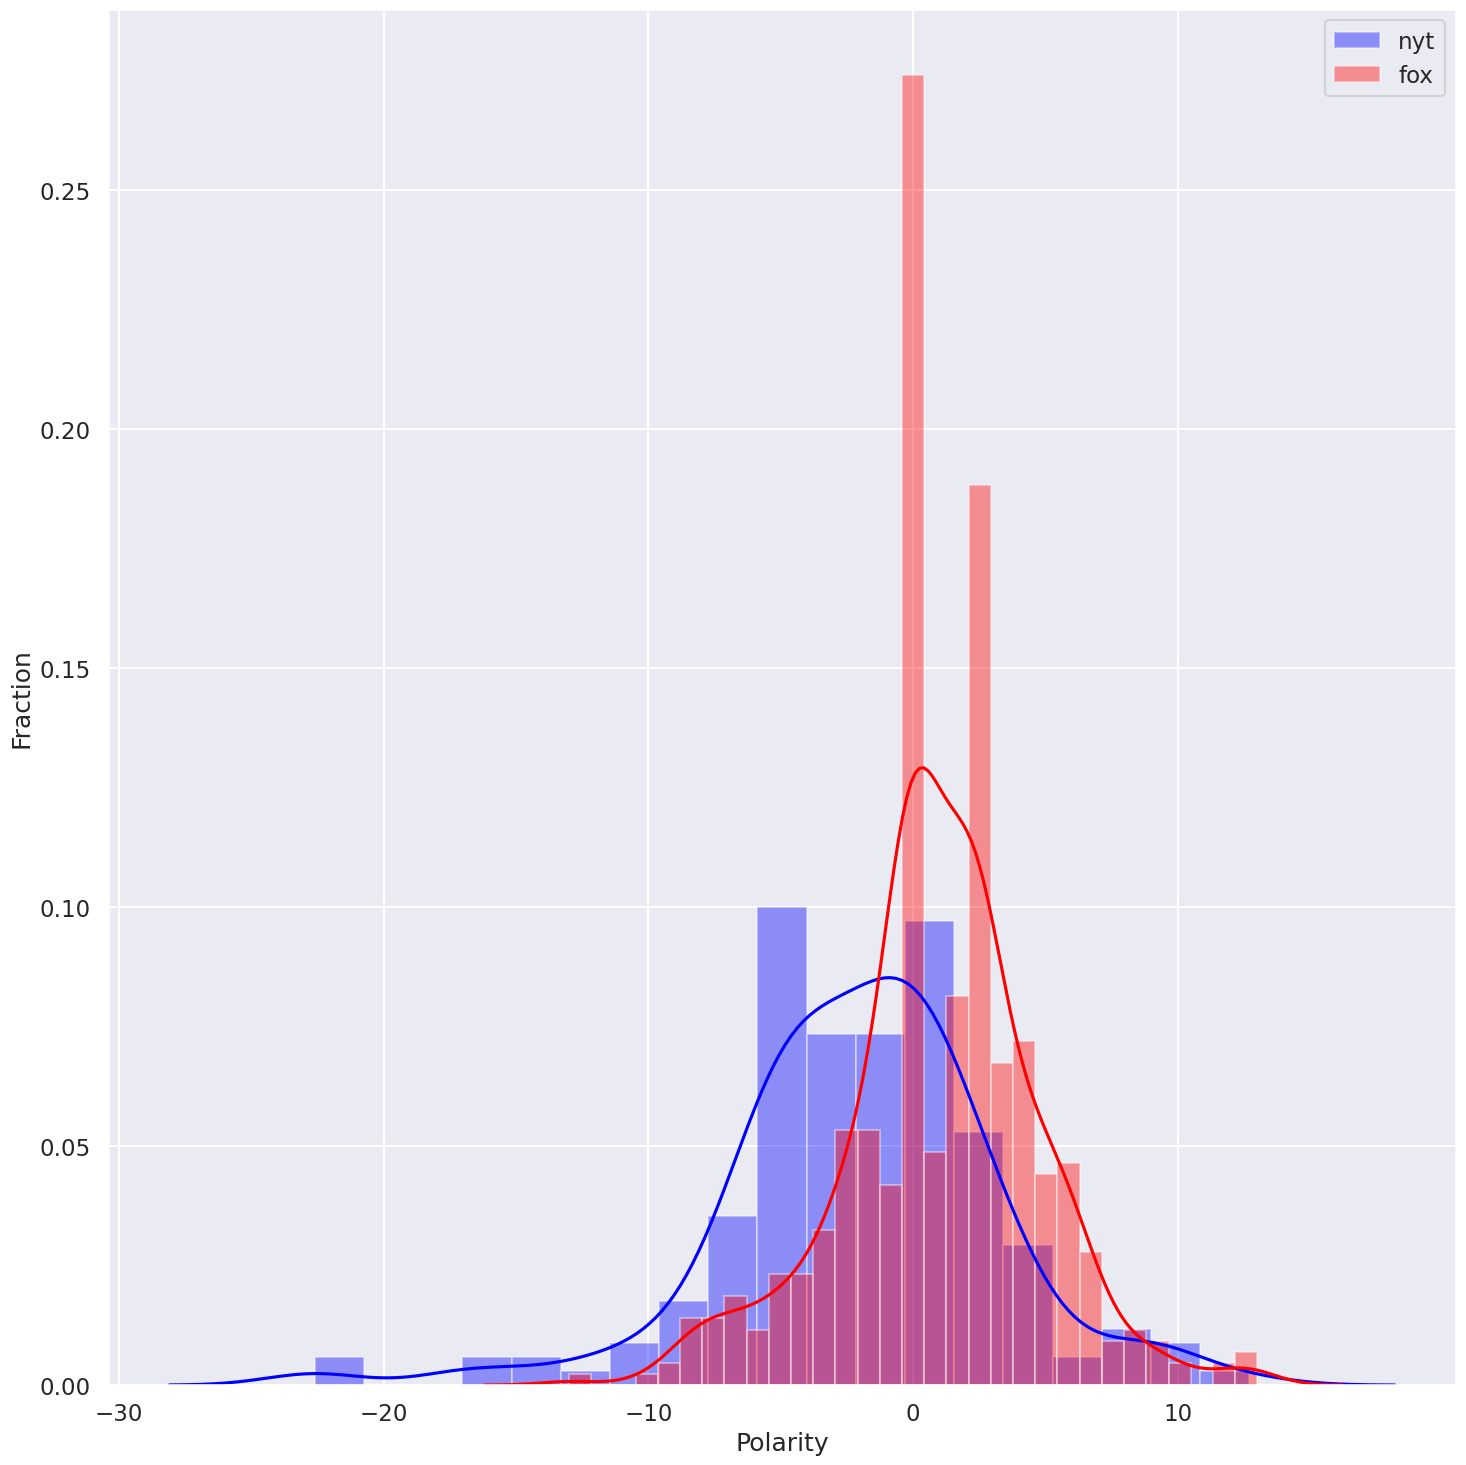

In [66]:
### BEGIN ANSWER
nyt_tweets = df_trump[df_trump['text'].str.contains('nyt')]
fox_tweets = df_trump[df_trump['text'].str.contains('fox')]
plt.figure(figsize=(15,15))
sns.distplot(nyt_tweets['polarity'], hist=True, label='nyt',color='blue')
sns.distplot(fox_tweets['polarity'], hist=True, label='fox',color='red')



plt.xticks(range(-30,20,10))
plt.ylabel('Fraction')
plt.xlabel('Polarity')
plt.tight_layout() 
plt.legend() 
# your solution here

### END ANSWER

##### Comment on what you observe:
The distribution of polarity for Trump's tweets containing 'nyt' seems to be skewed to the left of zero polarity, while the distribution for tweets containing 'fox' seems to be mostly neutral or positive. It also seems that there is a higher proportion of tweets containing 'fox' than nyt. 

## PART 4 - Principal Component Analysis (PCA) and Twitter 
A look at the top words used and the sentiments expressed in Trump tweets indicates that, some words are used with others almost all the time. A notable example is the slogan like **Make America Great Again**. As such, it may be beneficial to look at groups of words rather than individual words. For that, we will look at an approach applying a Principal Component Analysis. 

### The PCA
The Principal Component Analysis, or PCA, is a tool generally used to identify patterns and to reduce the number of variables you have to consider in your analysis. For example, if you have data with 200 columns, it may be that a significant amount of the variance in your data can be explained by just 100 principal components. In the PCA, the first component is chosen in such a way that has the largest variance, subsequent components are orthogonal and continue covering as much variance as possible. In this way, the PCA samples as much of the variability in the data set with the first few components. Mathematically, each component is a linear combination of all the input parameters times coefficients specific for that component. These coefficients, or loading factors, are constrained such that the sum of the squares of them are equal to 1. As such, the loading factors serve as weights describing how strongly certain parameters contribute to the specific principal component. Parameters with large values of positive or negative loading factors are correlated with each other, which can serve to identify trends in your data.

### Task 4.1 Cleaning up the Data
Using NLTK (Natural Language Toolkit) package for language processing and other python libraries, parse the json file to deal with inflected words, such as plurals, and removed stop words like common English words (the, and, it, etc) and certain political terms (the candidates names, for example). You can start with the top 50 words, but full analysis may require large number of words.
Create a document-frequecy (df) matrix with 5000 rows and 50 columns where each column is a particular word (feature) and each row is a tweet (observation). The values of the matrix is how often the word appears. Apply the techniques we learned to reduce the weight of most common words (if necessary). Since this is a sparse matrix, you can use the sparse martix libraries to make things a bit more efficient (we can also use a regular numpy arrays to store these things since the dimensions are not too large). See demo notes books and lecture slides for some sparse matrix methods.
Print the first 10 rows of the df to show the matrix you created

Start with the `tidy_format` dataframe

In [118]:
### BEGIN ANSWER
## code to plot the first 10 rows of the matrix
import nltk
import nltk.corpus
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('omw-1.4')

nltk.download('stopwords')
nltk.download('wordnet')
stop = stopwords.words('english')
lem = WordNetLemmatizer()

# create a dataframe called tmp to store all words appear in the tweets
tmp = tidy_format.copy()
# remove stopwords
tmp = tmp[~tmp['word'].isin(stop)]


# deal with plurals
tmp['word'].map(lambda x:lem.lemmatize(x))


# Remove numbers
tmp['word'] = tmp['word'].str.replace('\d+', '')


# Remove words with only 1 or 2 length
tmp.head()

tmp = tmp[tmp['word'].str.len()>2]




### END ANSWER

tmp.head()


[nltk_data] Downloading package omw-1.4 to /home/fjo25/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /home/fjo25/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/fjo25/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/tmp/ipykernel_2258018/736989877.py:25: FutureWarning: The default value of regex will change from True to False in a future version.
  tmp['word'] = tmp['word'].str.replace('\d+', '')


,num,word
id,,
947824196909961216,2,leaving
947824196909961216,3,florida
947824196909961216,5,washington
947824196909961216,8,today
947824196909961216,14,much


### Task 4.2 Find the PCA's
Write the code to find the first 50 PCA's for the document-frequency matrix. Pass the document-term-matrix to scikit-learn’s (https://scikit-learn.org/stable/modules/decomposition.html#decompositions) PCA method to obtain the components and loading factors.

In [139]:
### BEGIN ANSWER
import sklearn
from sklearn.decomposition import PCA
fifty_most_common = tmp['word'].value_counts().head(50)
fifty_most_common_df = tmp[tmp['word'].isin(fifty_most_common.index.tolist())]
fifty_most_common_df.drop(['num'],axis=1)
pca = PCA(n_components=50)
#fifty_most_common
pca.fit(fifty_most_common_df)
# your solution here

### END ANSWER

ValueError: could not convert string to float: 'today'

### Task 4.3 Examine the PCA
We can examine the PCA results to look at the heatmap. Make a grid plot which shows the various principal component along the x-axis and the individual words along the y-axes. Each grid box should be color-coded based on the sign of the loading factor and how large the square of that value is. Looking at it vertically, you can see which words constitute your principal components. Looking at it horizontally, you can see how individual terms are shared between components. Your answer will look closer to this.

![title](images/pca.png)



In [ ]:
### BEGIN ANSWER
   
# your solution here

### END ANSWER

### Task 4.4 PCA Compare
We can determine how many words and how many components are needed to do a good visualization. Plot PC1 and PC2 in a 2D plot. The results should be similar to following scatter plot 

![title](images/PC1_PC2.png)

This is a scatter plot of the values of the components, but with arrows indicating some of the prominent terms as indicated by their loading factors. The values of the loading factors are used to determine the length and direction of these arrows and as such they serve as a way of expressing direction. That is, tweets which use these terms will be moved along the length of those arrows. Shown are the most important parameters.

In [ ]:
### BEGIN ANSWER
   
# your solution here

### END ANSWER

## PART 5 - Twitter Engagement

In this problem, we'll explore which words led to a greater average number of retweets. For example, at the time of this writing, Donald Trump has two tweets that contain the word 'oakland' (tweets 932570628451954688 and 1016609920031117312) with 36757 and 10286 retweets respectively, for an average of 23,521.5.


Your `top_20` table should have this format:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>retweet_count</th>
    </tr>
    <tr>
      <th>word</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>jong</th>
      <td>40675.666667</td>
    </tr>
    <tr>
      <th>try</th>
      <td>33937.800000</td>
    </tr>
    <tr>
      <th>kim</th>
      <td>32849.595745</td>
    </tr>
    <tr>
      <th>un</th>
      <td>32741.731707</td>
    </tr>
    <tr>
      <th>maybe</th>
      <td>30473.192308</td>
    </tr>
  </tbody>
</table>

### Task 5.1
Find the top 20 most retweeted words. Include only words that appear in at least 25 tweets. As usual, try to do this without any for loops. You can string together ~5-7 pandas commands and get everything done on one line.

In [ ]:
#top_20 = ...
### BEGIN ANSWER
   
# your solution here

### END ANSWER

### Task 5.2
Plot a bar chart of your results:

In [ ]:
### BEGIN ANSWER
   
# your solution here

### END ANSWER

<div class="alert alert-block alert-info">
<h2>Submission Instructions</h2> 
<b> File Name:</b> Please rename the file as yourNetID_midsemester.jpynb<br>
<b> Submit To: </b> Codebench (Do not submit data files)<br>
<b>Warning:</b> Failure to follow directions may result in loss points.<br>
</div>

Created by Andy Guna @2019-2024 Credits: Josh Hug, and Berkeley Data Science Group, Steve Skiena, David Rodreguez

@ Copyrighted Material. DO NOT post online.